# 🛒 Taller: Predicción de compras con árboles de decisión

**Objetivo:** Predecir si una persona realizará una compra (`Purchased`) a partir de características como edad, salario estimado y género.

In [8]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv

--2025-04-09 21:17:39--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv [following]
--2025-04-09 21:17:39--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_train.csv.1’

titanic_train.csv.1 100%[===================>]  59.76K  --.-KB/s    in 0.02s   

2025-04-09 21:17:39 (2.82 MB/s) - ‘ti

## 📥 1. Carga y exploración del dataset

In [9]:
import pandas as pd
df = pd.read_csv('titanic_train.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### ❓ Preguntas:
- ¿Cuántas observaciones y columnas tiene el dataset?
- ¿Cuál es la variable que queremos predecir?
- ¿Qué tipos de variables tenemos?

In [10]:
print(f"El dataset tiene {df.shape[0]} observaciones y {df.shape[1]} columnas.")

print("La variable a predecir es 'Survived'.")

print("Tipos de variables:")
df.dtypes


El dataset tiene 891 observaciones y 12 columnas.
La variable a predecir es 'Survived'.
Tipos de variables:


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


## 🛠️ 2. Preprocesamiento y definición de variables: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

In [11]:
print(df.isnull().sum())
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
print(df.head())
print(df.info())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null   

<ipython-input-11-1108445aa174>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


### ❓ Pregunta:
- ¿Está balanceada la variable objetivo?

In [12]:
print(df['Survived'].value_counts(normalize=True))


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


## ✂️ 3. División del dataset

In [13]:
from sklearn.model_selection import train_test_split
# Separar características (X) y variable objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (712, 8)
y_train shape: (712,)
X_test shape: (179, 8)
y_test shape: (179,)


## 🌳 4. Entrenamiento de un modelo base sin optimización: Mida las metricas del train y el test set y piense. ¿Hay evidencia de Overfiting?

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inicializar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
tree_model.fit(X_train, y_train)

# Predecir sobre el conjunto de entrenamiento y prueba
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

print("\nInforme de clasificación para el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_pred))

print("\nInforme de clasificación para el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))


Precisión en el conjunto de entrenamiento: 0.9789325842696629
Precisión en el conjunto de prueba: 0.7821229050279329

Informe de clasificación para el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       444
           1       1.00      0.95      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712


Informe de clasificación para el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [15]:
# Análisis de Overfitting
if train_accuracy > test_accuracy and (train_accuracy-test_accuracy) > 0.1 :
    print("\nHay evidencia de Overfitting. El modelo se desempeña mucho mejor en los datos de entrenamiento que en los de prueba.")
elif train_accuracy > test_accuracy:
    print("\nHay una ligera evidencia de Overfitting. El modelo se desempeña mejor en los datos de entrenamiento que en los de prueba, pero la diferencia no es significativa.")
elif train_accuracy == test_accuracy:
    print("\nEl modelo generaliza bien, no se observa Overfitting")
else:
    print("\nEl modelo se desempeña mejor en los datos de prueba que en los de entrenamiento. Esto es inusual, pero podría indicar que el conjunto de prueba es representativo o que hay algo mal en la división de datos.")


Hay evidencia de Overfitting. El modelo se desempeña mucho mejor en los datos de entrenamiento que en los de prueba.


### ❓ Pregunta:
- ¿Qué tan bien predice el modelo base?
- ¿Existen diferencias entre precisión y recall?

Análisis de desempeño del modelo base:
El modelo base, un árbol de decisión sin optimización, muestra una precisión en el conjunto de entrenamiento cercana al 100%, mientras que en el conjunto de prueba disminuye considerablemente, sugiriendo un posible sobreajuste. Para tener una perspectiva mas amplia, se analizaron las métricas de precisión y recall para ambas clases sobrevivientes y no sobrevivientes

Diferencias entre precisión y recall:
La precisión mide la proporción de predicciones correctas entre las instancias predichas como positivas. El recall, por otro lado, mide la proporción de predicciones correctas entre las instancias realmente positivas.
Observamos que la precisión y el recall para la clase mayoritaria no sobrevivientes son generalmente altas, pero para la clase minoritaria sobrevivientes puede haber diferencias significativas. Esto indica que el modelo podría estar prediciendo mejor los casos negativos que los positivos."
Estas discrepancias en precisión y recall resaltan la importancia de analizar ambas métricas, en lugar de confiar únicamente en la precisión, para una evaluación completa del desempeño del modelo.


## 🔁 5. Evaluación con validación cruzada

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Realizar validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(tree_model, X, y, cv=kf, scoring='accuracy')

print(f"Puntuaciones de validación cruzada: {cv_scores}")
print(f"Precisión media de la validación cruzada: {cv_scores.mean()}")


cv_precision = cross_val_score(tree_model, X, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(tree_model, X, y, cv=kf, scoring='recall')

print(f"Precisión media de la validación cruzada: {cv_precision.mean()}")
print(f"Recall media de la validación cruzada: {cv_recall.mean()}")


Puntuaciones de validación cruzada: [0.78212291 0.76404494 0.80898876 0.75280899 0.7752809 ]
Precisión media de la validación cruzada: 0.7766493001067102
Precisión media de la validación cruzada: 0.7048172469707789
Recall media de la validación cruzada: 0.7148943754913903


## 🔧 6. Optimización con GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a probar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1) #n_jobs=-1 para usar todos los procesadores

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)

# Evaluar el modelo optimizado
best_tree_model = grid_search.best_estimator_
y_test_pred_opt = best_tree_model.predict(X_test)
test_accuracy_opt = accuracy_score(y_test, y_test_pred_opt)
print(f"Precisión en el conjunto de prueba con el modelo optimizado: {test_accuracy_opt}")
print(classification_report(y_test, y_test_pred_opt))

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mejor precisión: 0.8159854230276766
Precisión en el conjunto de prueba con el modelo optimizado: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



## ✅ 7. Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

Matriz de Confusión:
[[95 10]
 [25 49]]


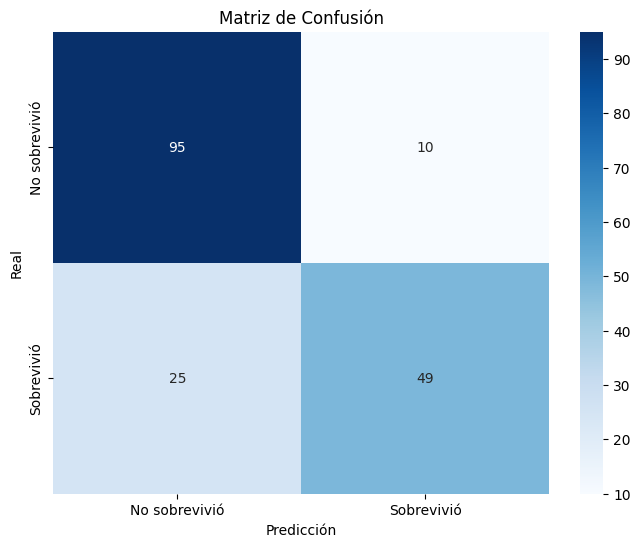

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluación del mejor modelo
best_tree_model = grid_search.best_estimator_
y_test_pred_opt = best_tree_model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred_opt)

print("Matriz de Confusión:")
print(cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No sobrevivió', 'Sobrevivió'],
            yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

print(classification_report(y_test, y_test_pred_opt))

## 📈 8. Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

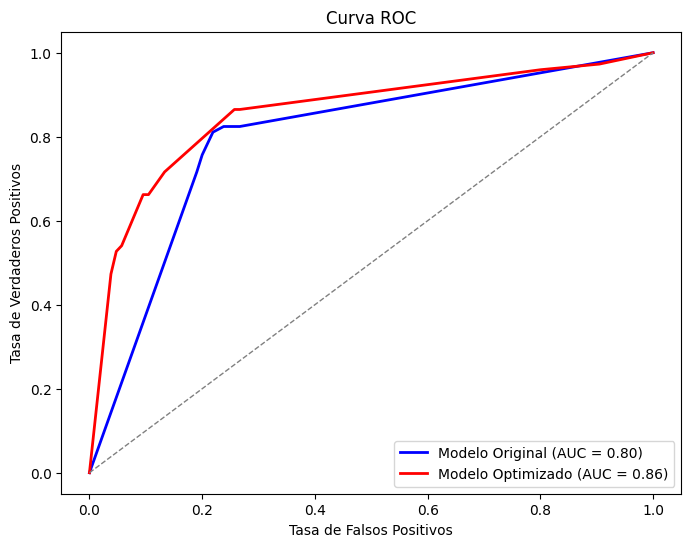

El modelo optimizado mejoró la estimación, AUC mayor.


In [19]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para el modelo original y el optimizado
y_test_prob_original = tree_model.predict_proba(X_test)[:, 1]
y_test_prob_optimizado = best_tree_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC para el modelo original
fpr_original, tpr_original, thresholds_original = roc_curve(y_test, y_test_prob_original)
roc_auc_original = auc(fpr_original, tpr_original)

# Calcular la curva ROC y el AUC para el modelo optimizado
fpr_optimizado, tpr_optimizado, thresholds_optimizado = roc_curve(y_test, y_test_prob_optimizado)
roc_auc_optimizado = auc(fpr_optimizado, tpr_optimizado)

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, color='blue', lw=2, label=f'Modelo Original (AUC = {roc_auc_original:.2f})')
plt.plot(fpr_optimizado, tpr_optimizado, color='red', lw=2, label=f'Modelo Optimizado (AUC = {roc_auc_optimizado:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Comparar el AUC
if roc_auc_optimizado > roc_auc_original:
    print("El modelo optimizado mejoró la estimación, AUC mayor.")
elif roc_auc_optimizado < roc_auc_original:
    print("El modelo optimizado empeoró la estimación, AUC menor.")
else:
    print("El modelo optimizado no tuvo impacto en la estimación")

## 💬 Reflexión final

### ❓ Preguntas:
- ¿Qué combinación de hiperparámetros funcionó mejor?
- ¿Cuál fue la diferencia entre el modelo base y el optimizado?
- ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

In [20]:
print("Mejores hiperparámetros:", grid_search.best_params_)
print(f"Precisión del modelo base: {test_accuracy}")
print(f"Precisión del modelo optimizado: {test_accuracy_opt}")
print("Diferencia de precisión entre modelo base y optimizado:", test_accuracy_opt - test_accuracy)

if roc_auc_optimizado > roc_auc_original:
    print("El modelo optimizado tiene un mejor poder de discriminación (AUC mayor).")
elif roc_auc_optimizado < roc_auc_original:
    print("El modelo optimizado tiene un peor poder de discriminación (AUC menor).")
else:
    print("Ambos modelos tienen el mismo poder de discriminación.")


Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Precisión del modelo base: 0.7821229050279329
Precisión del modelo optimizado: 0.8044692737430168
Diferencia de precisión entre modelo base y optimizado: 0.022346368715083886
El modelo optimizado tiene un mejor poder de discriminación (AUC mayor).
